In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# https://raw.githubusercontent.com/nkmwicz/
# data-for-students/refs/heads/main/soccer-players.csv
url = "https://raw.githubusercontent.com/nkmwicz/data-for-students/refs/heads/main/soccer-players.csv"

players = pd.read_csv(url)
players.head()


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [2]:
from scripts.eda import eda

eda(players)

DF shape = (32403, 23)
====Numeric Columns====
player_id
	 is numeric
	 # Nullish = 0
	 Mean = 344578.92571675463
	 Median = 282421.0
	 Mode = 10
	 ST.Dev = 280683.140
	 33%ile = 164008.24
	 66%ile = 409539.4
last_season
	 is numeric
	 # Nullish = 0
	 Mean = 2019.3377773662933
	 Median = 2020.0
	 Mode = 2024
	 ST.Dev = 3.966
	 33%ile = 2017.0
	 66%ile = 2022.0
current_club_id
	 is numeric
	 # Nullish = 0
	 Mean = 4809.252044563775
	 Median = 1071.0
	 Mode = 2553
	 ST.Dev = 11601.983
	 33%ile = 589.0
	 66%ile = 2441.0
height_in_cm
	 is numeric
	 # Nullish = 2344
	 Mean = 182.29116071725608
	 Median = 183.0
	 Mode = 180.0
	 ST.Dev = 6.971
	 33%ile = 179.0
	 66%ile = 185.0
market_value_in_eur
	 is numeric
	 # Nullish = 1534
	 Mean = 1611350.0599306747
	 Median = 250000.0
	 Mode = 100000.0
	 ST.Dev = 6362017.247
	 33%ile = 150000.0
	 66%ile = 400000.0
highest_market_value_in_eur
	 is numeric
	 # Nullish = 1534
	 Mean = 3675044.705043895
	 Median = 800000.0
	 Mode = 100000.0
	 ST.Dev = 9653

In [3]:
# t-test on right vs left footed players and birth months
# ANOVA on position and birth months.

# get birth months => new column
# drop na from dobs
# create new df for each test with columns we want
# drop na from foot df
# separate into groups

In [4]:
players['birth_mth'] = pd.to_datetime(players['date_of_birth']).dt.month
players['birth_mth']

0        6.0
1        8.0
2        1.0
3        5.0
4        3.0
        ... 
32398    2.0
32399    9.0
32400    2.0
32401    1.0
32402    6.0
Name: birth_mth, Length: 32403, dtype: float64

In [5]:
players_len = len(players)
players = players.dropna(subset=['birth_mth'])
dropped_len = len(players)
print(f"Dropped {players_len - dropped_len} rows from players dataframe")

Dropped 47 rows from players dataframe


In [6]:
footed_df = players[["foot", "birth_mth"]].dropna()
positions_df = players[["position", "birth_mth"]].dropna()

In [7]:
footed_df.head()

,foot,birth_mth
0,right,6.0
1,left,8.0
4,right,3.0
7,both,10.0
8,right,6.0


In [8]:
# right = footed_df.loc[footed_df['foot'] == 'right', 'birth_mth']
# left =  footed_df.loc[footed_df['foot'] == 'left', 'birth_mth']
options = ['right', 'left']

vars = [footed_df.loc[footed_df['foot'] == foot, 'birth_mth'] for foot in options]

t, p = stats.ttest_ind(*vars)
print(f"t={t:.4f}, p={p:.4f}")

t=0.3343, p=0.7382


In [9]:
deg_f = len(vars[0]) + len(vars[1]) - 2
alpha = 0.05

crit_t = stats.t.ppf(1-alpha/2, deg_f)
crit_t

np.float64(1.9600475481417527)

In [10]:
footed_df['foot'].unique()

array(['right', 'left', 'both'], dtype=object)

In [11]:
uniques = footed_df['foot'].unique()
vars = [footed_df.loc[footed_df['foot'] == foot, 'birth_mth'] for foot in uniques]
f,p = stats.f_oneway(*vars)
print(f"f={f:.4f}, p={p:.4f}")

f=1.4104, p=0.2441


In [12]:
one_footed = footed_df.loc[footed_df['foot'].isin(['right', 'left']), 'birth_mth']
both_footed = footed_df.loc[~footed_df['foot'].isin(['right', 'left']), 'birth_mth']

In [13]:
one_len = len(one_footed)
both_len = len(both_footed)
one_len - both_len

27007

In [14]:
t, p = stats.ttest_ind(both_footed, one_footed)
print(f"t={t:.4f} p={p:.4f}")

t=-1.6459 p=0.0998


In [15]:
u_pos = positions_df['position'].unique()
vars = [positions_df.loc[positions_df['position'] == pos, 'birth_mth'] for pos in u_pos]
f, p = stats.f_oneway(*vars)
print(f"f={f:.4f} p={p:.4f}")

f=3.2134 p=0.0120


In [16]:
dfb = len(u_pos) - 1
dfw = len(positions_df) - len(u_pos)

crit_f = stats.f.ppf(1-alpha, dfb, dfw)
crit_f

np.float64(2.372206772040356)

In [20]:
scipy_tukey = stats.tukey_hsd(*vars)
print(scipy_tukey)
print(u_pos)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.183     0.049     0.001     0.366
 (0 - 2)      0.146     0.027     0.011     0.281
 (0 - 3)      0.124     0.103    -0.014     0.263
 (0 - 4)      0.337     0.686    -0.365     1.040
 (1 - 0)     -0.183     0.049    -0.366    -0.001
 (1 - 2)     -0.037     0.979    -0.216     0.141
 (1 - 3)     -0.059     0.902    -0.240     0.122
 (1 - 4)      0.154     0.977    -0.558     0.866
 (2 - 0)     -0.146     0.027    -0.281    -0.011
 (2 - 1)      0.037     0.979    -0.141     0.216
 (2 - 3)     -0.022     0.992    -0.155     0.112
 (2 - 4)      0.191     0.946    -0.510     0.893
 (3 - 0)     -0.124     0.103    -0.263     0.014
 (3 - 1)      0.059     0.902    -0.122     0.240
 (3 - 2)      0.022     0.992    -0.112     0.155
 (3 - 4)      0.213     0.922    -0.489     0.915
 (4 - 0)     -0.337     0.686    -1.040     0.365
 (4 - 1)     -0.154     0.977    -0.866     

array([-0.1457403 , -0.18312049, -0.12423927, -0.3370988 , -0.03738019,
        0.02150103, -0.1913585 ,  0.05888122, -0.15397831, -0.21285953])

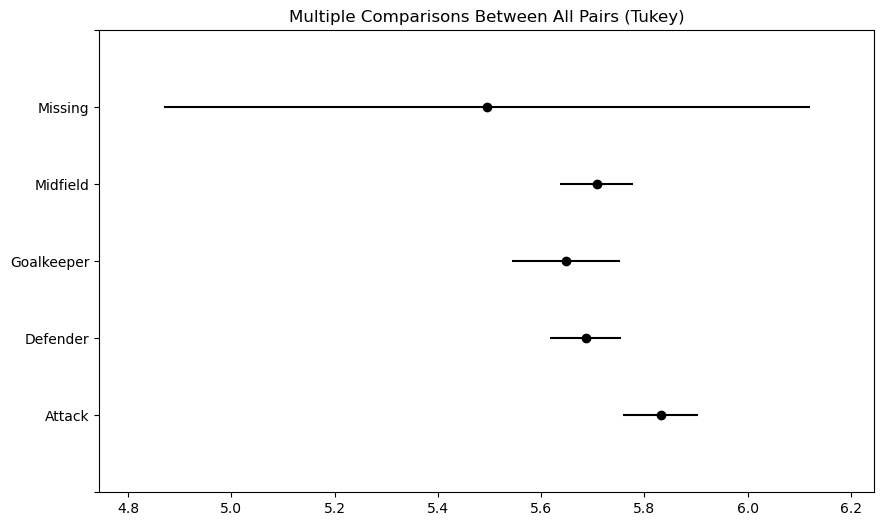

In [ ]:
tukey_res = pairwise_tukeyhsd(
    endog=positions_df['birth_mth'],
    groups=positions_df['position'],
    alpha=alpha,
)
tukey_res.summary()
tukey_res.plot_simultaneous()

In [ ]:
attackers = positions_df.loc[positions_df['position'] == 'Attack', "birth_mth"].mean()
goalkeepers = positions_df.loc[positions_df['position'] == 'Goalkeeper', "birth_mth"].mean()
defenders = positions_df.loc[positions_df['position'] == 'Defender', "birth_mth"].mean()

if attackers > goalkeepers:
    print("Attackers mean is greater")
else:
    print("Goalkeepers/Defenders mean == greater")

Atteckers mean is greater


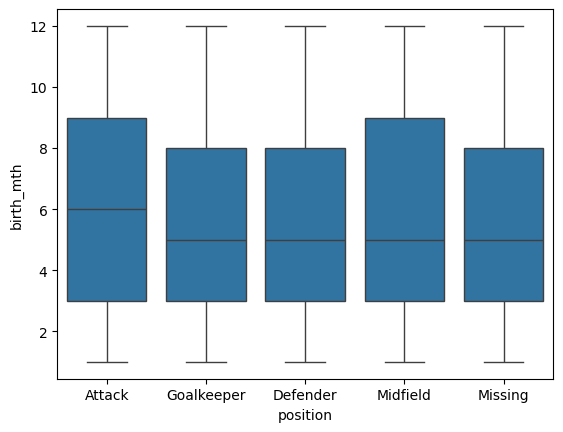

In [18]:
import seaborn as sns
box = sns.boxplot(data=positions_df, x='position', y='birth_mth')

In [19]:
for idx in range(len(u_pos)-1):
    for idx2 in range(len(u_pos)-1, 0, -1):
        if idx == idx2:
            continue
        group1 = u_pos[idx]
        group2 = u_pos[idx2]
        list1 = positions_df.loc[positions_df['position'] == group1, 'birth_mth']
        list2 = positions_df.loc[positions_df['position'] == group2, 'birth_mth']
        t,p = stats.ttest_ind(list1, list2)
        print(f"{group1}-{group2}=(t:{t:.4f}, p:{p:.4})")

Attack-Missing=(t:1.3019, p:0.193)
Attack-Midfield=(t:2.4304, p:0.01509)
Attack-Defender=(t:2.9355, p:0.003334)
Attack-Goalkeeper=(t:2.7425, p:0.006105)
Goalkeeper-Missing=(t:0.6039, p:0.5459)
Goalkeeper-Midfield=(t:-0.8879, p:0.3746)
Goalkeeper-Defender=(t:-0.5753, p:0.5651)
Defender-Missing=(t:0.7465, p:0.4554)
Defender-Midfield=(t:-0.4389, p:0.6608)
Defender-Goalkeeper=(t:0.5753, p:0.5651)
Midfield-Missing=(t:0.8222, p:0.411)
Midfield-Defender=(t:0.4389, p:0.6608)
Midfield-Goalkeeper=(t:0.8879, p:0.3746)
